<a href="https://colab.research.google.com/github/durgeshgitup/MA22C013_2023_PL/blob/main/Assignments/Assignment_9/Passengers_of_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = seaborn.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#Tasks: The exercise is to answer the following questions.

### • How many passengers are described in the data set?

In [ ]:
df.shape

(891, 15)

### • How many distinct values are in who column?

In [ ]:
df.describe().sum()


survived     893.870431
pclass       906.144713
age          924.770615
sibsp        901.625751
parch        898.187651
fare        1538.591437
dtype: float64

### • How many missing values do you fnd in each data column?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### • Does the data contain passengers over 60 old? How many?

### • What is the passenger age distribution? (Plot it.)

<ipython-input-17-bf9fa8f14489>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='age'>

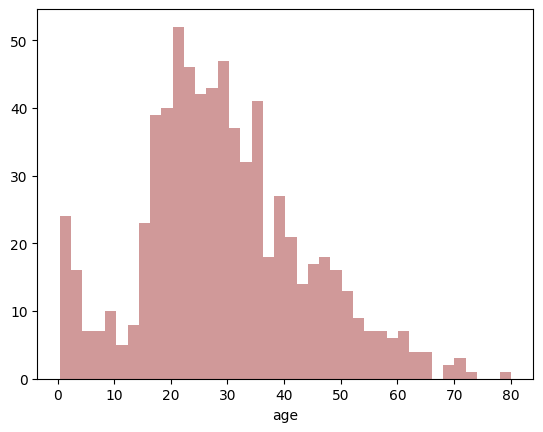

In [ ]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=40)

### • What are the 3-quantiles of the passenger age distribution?

### • How will you drop all passengers with no embarked data?

In [ ]:
missing_embarked = df['embarked'].isnull()
titanic_df = df[missing_embarked]
print(titanic_df)

     survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  
61   woman       False    B         NaN   yes   True  
829  woman       False    B         NaN   yes   True  


### • What is the average, minimum, and maximum fares paid by the passengers?

In [ ]:
average_fare = df['fare'].mean()
minimum_fare = df['fare'].min()
maximum_fare = df['fare'].max()

print(average_fare)
print(minimum_fare)
print(maximum_fare)

32.204207968574636
0.0
512.3292


### • What are the proportions of passengers in different classes?

In [ ]:
class_counts = df['pclass'].value_counts()
total_passengers = len(df)
class_proportions = class_counts / total_passengers
print(class_proportions)

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64


### • What is the female to male ratio in each travel class?

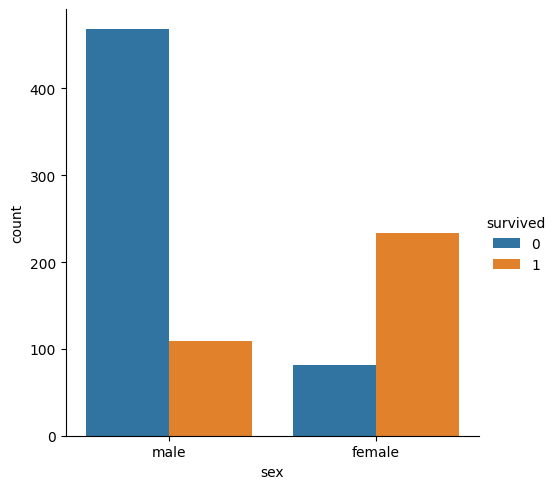

In [ ]:
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = df)

### • What fraction survived?

In [ ]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

### • Are the survival rates of male and female passengers different?

<Axes: xlabel='sex', ylabel='age'>

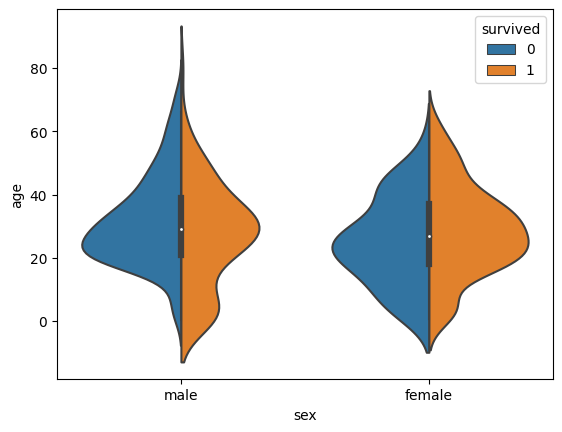

In [ ]:
sns.violinplot(x ="sex", y ="age", hue ="survived",
data = df, split = True)

In [ ]:
df.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


### • Are the survival rates of frst, second, and third class passengers different?

<Axes: xlabel='survived', ylabel='pclass'>

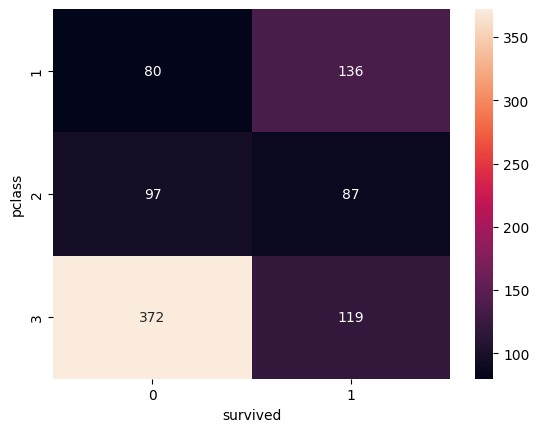

In [ ]:
group = df.groupby(['pclass', 'survived'])
pclass_Survived = group.size().unstack()
sns.heatmap(pclass_Survived, annot = True, fmt ="d")

### • How can one print a table of survival rate dependencies on class and gender?

In [ ]:
df.pivot_table('survived', index='sex', columns='class',)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### • How can one print a table with number of survivors and average fare for each gender and cabin?

In [ ]:
result = df.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})
print(result)

              fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47
